In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import *
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('criteo_sampled_data.csv')
data.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,1.0,2.0,NaN,2.0,68fd1e64,80e26c9b,fb936136,7b4723c4,25c83c98,7e0ccccf,de7995b8,1f89b562,a73ee510,a8cd5504,b2cb9c98,37c9c164,2824a5f6,1adce6ef,8ba8b39a,891b62e7,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,1.0,1.0,NaN,4.0,68fd1e64,f0cf0024,6f67f7e5,41274cd7,25c83c98,fe6b92e5,922afcc0,0b153874,a73ee510,2b53e5fb,4f1b46f3,623049e6,d7020589,b28479f6,e6c5b5cd,c92f3b61,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,1.0,3.0,3.0,45.0,287e684f,0a519c5c,02cf9876,c18be181,25c83c98,7e0ccccf,c78204a1,0b153874,a73ee510,3b08e48b,5f5e6091,8fe001f4,aa655a2f,07d13a8f,6dc710ed,36103458,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,68fd1e64,2c16a946,a9a87e68,2e17d6f6,25c83c98,fe6b92e5,2e8a689b,0b153874,a73ee510,efea433b,e51ddf94,a30567ca,3516f6e6,07d13a8f,18231224,52b8680f,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,1.0,1.0,NaN,0.0,8cf07265,ae46a29d,c81688bb,f922efad,25c83c98,13718bbd,ad9fa255,0b153874,a73ee510,5282c137,e5d8af57,66a76a26,f06c53ac,1adce6ef,8ff4b403,01adbab4,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [4]:
cols = data.columns.values
dense_features = [f for f in cols if f[0] == 'I']
sparse_features = [f for f in cols if f[0] == 'C']

In [5]:
def process_dense_features(data, features):
    d = data.copy()
    d = d[features].fillna(0.)
    for f in features:
        d[f] = d[f].apply(lambda x: np.log(x + 1) if x > -1 else -1)
    return d
data_dense = process_dense_features(data, dense_features)

In [6]:
from sklearn.preprocessing import LabelEncoder
def process_sparse_features(data, features):
    d = data.copy()
    d = d[features].fillna('-1')
    for f in features:
        label_encoder = LabelEncoder()
        d[f] = label_encoder.fit_transform(d[f])
    return d
data_sparse = process_sparse_features(data, sparse_features)

In [7]:
total_data = pd.concat([data_dense, data_sparse], axis=1)
total_data['label'] = data['label']

In [8]:
import tensorflow as tf
k = 8

In [9]:
dense_inputs = []
for f in dense_features:
    _input = Input([1], name=f)
    dense_inputs.append(_input)
dense_inputs

[<tf.Tensor 'I1:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I2:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I3:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I4:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I5:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I6:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I7:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I8:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I9:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I10:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I11:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I12:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'I13:0' shape=(None, 1) dtype=float32>]

In [10]:
dense_kd_embed = []
for i, _input in enumerate(dense_inputs):
    f = dense_features[i]
    embed = tf.Variable(tf.random.truncated_normal(shape=(1, k), stddev=0.01), name=f)
    scaled_embed = tf.expand_dims(_input * embed, axis=1)
    dense_kd_embed.append(scaled_embed)
dense_kd_embed

[<tf.Tensor 'ExpandDims:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_1:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_2:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_3:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_4:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_5:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_6:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_7:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_8:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_9:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_10:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_11:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'ExpandDims_12:0' shape=(None, 1, 8) dtype=float32>]

In [11]:
sparse_inputs = []
for f in sparse_features:
    _input = Input([1], name=f)
    sparse_inputs.append(_input)
sparse_inputs

[<tf.Tensor 'C1:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C2:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C3:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C4:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C5:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C6:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C7:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C8:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C9:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C10:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C11:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C12:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C13:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C14:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C15:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C16:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C17:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C18:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C19:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'C20:0' s

In [15]:
sparse_kd_embed = []
for i, _input in enumerate(sparse_inputs):
    f = sparse_features[i]
    voc_size = data[f].nunique()
    _embed = Embedding(voc_size+1, k, embeddings_regularizer=tf.keras.regularizers.l2(0.5))(_input)
    sparse_kd_embed.append(_embed)
sparse_kd_embed

[<tf.Tensor 'embedding_52/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_53/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_54/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_55/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_56/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_57/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_58/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_59/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_60/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_61/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_62/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_63/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_64/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_65/Identity:0' shape=(None, 

In [18]:
input_embeds = dense_kd_embed + sparse_kd_embed
embed_map = Concatenate(axis=1)(input_embeds)
embed_map

<tf.Tensor 'concatenate_1/Identity:0' shape=(None, 39, 8) dtype=float32>

In [25]:
def auto_interacting(embed_map, d=32, H=2):
    k = embed_map.shape[-1]

    attention_heads = []
    w_query = []
    w_key = []
    w_value = []

    for i in range(H):
        w_query.append(tf.Variable(tf.random.truncated_normal(shape=(k, d)), name='query ' + str(i)))
        w_key.append(tf.Variable(tf.random.truncated_normal(shape=(k, d)), name='key ' + str(i)))
        w_value.append(tf.Variable(tf.random.truncated_normal(shape=(k, d)),name='value ' + str(i)))

    for i in range(H):
        embed_query = tf.matmul(embed_map, w_query[i])
        embed_key = tf.matmul(embed_map, w_key[i])
        embed_value = tf.matmul(embed_map, w_value[i])

        attention = tf.nn.softmax(tf.matmul(embed_query, tf.transpose(embed_key, [0, 2, 1])))

        attention_output = tf.matmul(attention, embed_value)

        attention_heads.append(attention_output)
    
    attention_outputs = Concatenate(axis=-1)(attention_heads)

    w_res = tf.Variable(tf.random.truncated_normal(shape=(k, d * H)), name='w_res')
    output = Activation('relu')(attention_outputs + tf.matmul(embed_map, w_res))

    return output

In [26]:
def build_autoint(x0, n_layers):
    xl = x0
    for i in range(n_layers):
        xl = auto_interacting(xl)
    return xl

In [27]:
autoint_layer = build_autoint(embed_map, 3)

In [28]:
autoint_layer = Flatten()(autoint_layer)
autoint_layer

<tf.Tensor 'flatten/Identity:0' shape=(None, 2496) dtype=float32>

In [29]:
output_layer = Dense(1, activation='sigmoid')(autoint_layer)

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

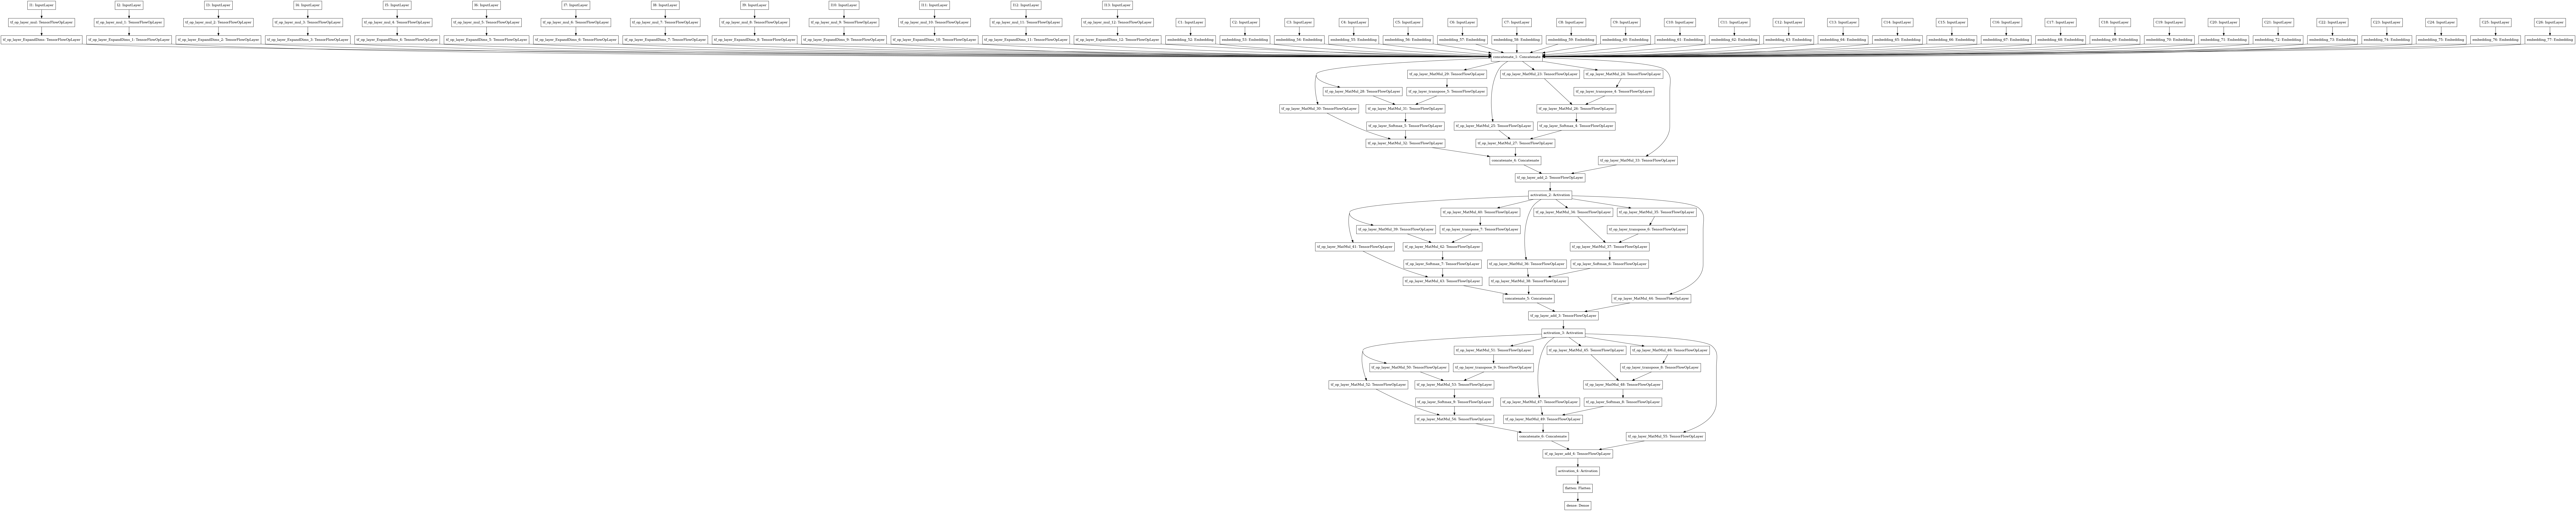

In [31]:
model = Model(dense_inputs + sparse_inputs, output_layer)
plot_model(model, 'autoint.png')

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_crossentropy', 'accuracy', tf.keras.metrics.AUC(name='auc')])

In [34]:
from tensorflow.keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./logs',  
                 histogram_freq=0, 
                 write_graph=True, 
                 write_grads=True, 
                 write_images=True,
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)

In [35]:
total_data = total_data.sample(frac=1.0, random_state=1)
train_data = total_data.iloc[:500000]
val_data = total_data.iloc[500000:]

train_dense = [train_data[f] for f in dense_features]
train_sparse = [train_data[f] for f in sparse_features]

train_label = [train_data['label'].values]

val_dense = [val_data[f] for f in dense_features]
val_sparse = [val_data[f] for f in sparse_features]

val_label = [val_data['label'].values]

In [36]:
model.fit(
    train_dense + train_sparse,
    train_label, epochs=5, batch_size=256,
    validation_data=(val_dense + val_sparse, val_label),
    callbacks=[tbCallBack]
)

Train on 500000 samples, validate on 100000 samples
Epoch 1/5
 25856/500000 [>.............................] - ETA: 20:00 - loss: 413.0320 - binary_crossentropy: 0.6013 - accuracy: 0.7243 - auc: 0.6342

KeyboardInterrupt: 